# 3.4. Machine Learning: Predicting Diabetes

### Understanding Machine Learning Basics
1. Load in datasets
2. Divide data into training and testing sets
3. Analyzing metrics for model success
4. Changing models to match dataset
5. Understanding how to analyze "weights" related to fitted algorithms

---

We are given a dataset for a large set of patients and our task is to find which patients are at risk of having diabetes without seeing their A1C or blood glucose.

Here, we are going to start this example with a logistical regression; basically, we want to determine between a 0 and a 1 whether a patient 0 (does not have diabetes) or 1 (has diabetes).

This dataset describes individuals either without diabetes (0) or with diabetes (1), and has several other descriptors for each patient. With a logistical machine learning algorithm, given a new patient, we should be able to predict with good accuracy whether or not they currently have diabetes.

First, let's import our data and the library scikit-learn, which comes stacked with several easy-to-call tools for machine learning.

In [2]:
#pip install pandas scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_data.csv')
print(df.head(3))

    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  


Total rows in the dataset: 70692
Counts of 0 and 1 in the 'Diabetes' column:
Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64


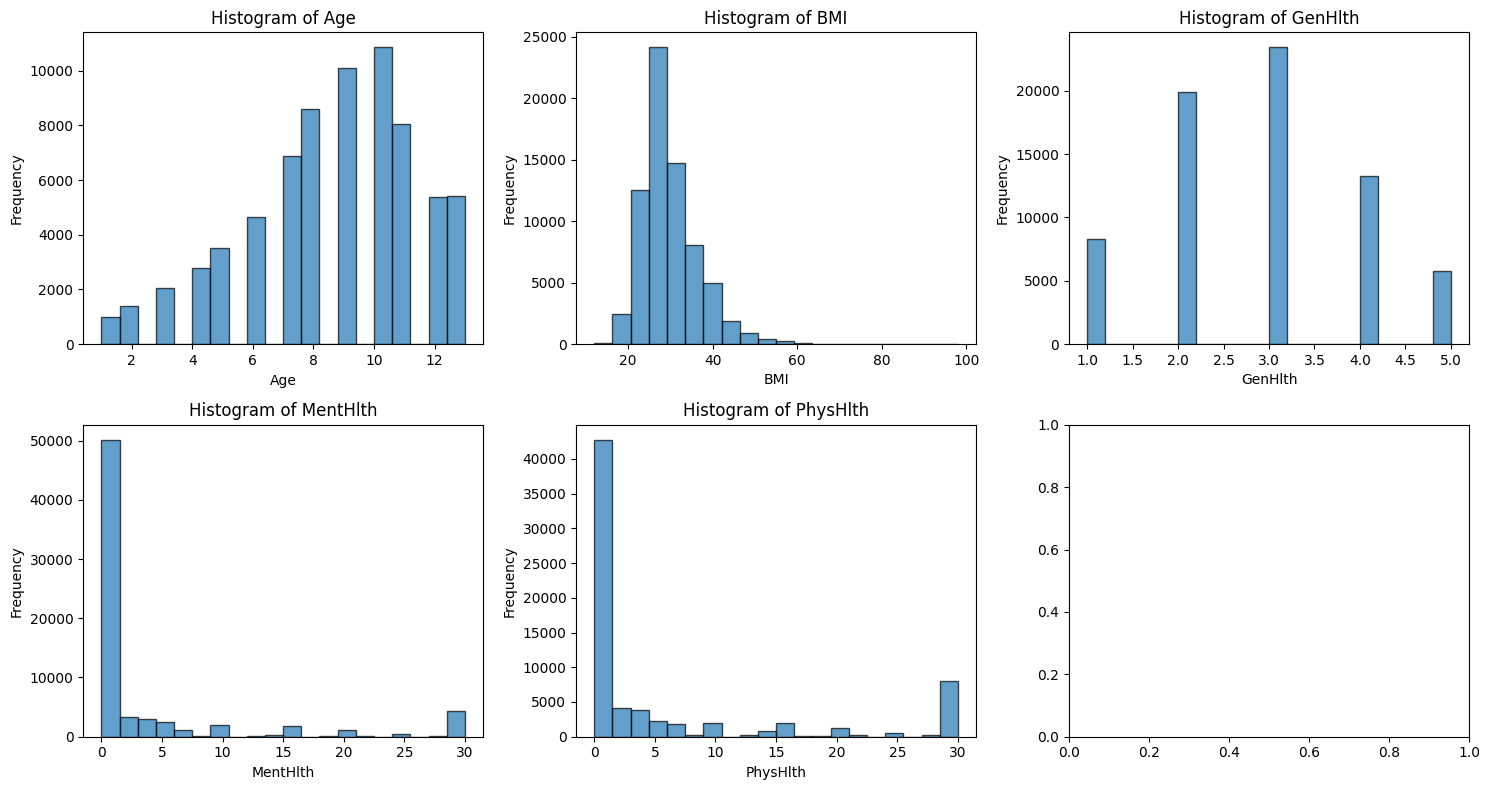

In [3]:
#Let's look at what kind of data and distribution we are dealing with

# Check the total number of rows
total_rows = len(df)
print(f"Total rows in the dataset: {total_rows}")

# Check the count of 0 and 1 in the "Diabetes" column
diabetes_counts = df['Diabetes'].value_counts()
print("Counts of 0 and 1 in the 'Diabetes' column:")
print(diabetes_counts)


# Create histograms for selected columns
selected_columns = ["Age", "BMI", "GenHlth", "MentHlth", "PhysHlth"]

# Set up subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each selected column
for i, column in enumerate(selected_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust subplot layout
plt.tight_layout()

# Show the histograms
plt.show()

Now we know a few things about our dataset
1. There are 70,692 patients in this dataset
2. There is an equal split between diabetics and non-diabetics
3. Age is right-skewed towards 10
4. BMI is left-skewed towards ~26
5. GenHlth looks like a Gaussian distribution around 3
6. MentHlth and PhysHlth have lots of 0 values

Now let's prep our data for a training a machine learning algorithm, meaning we need to have both a training set and a testing (or validation) set. 

For this sci-kit comes in handy.

In [4]:
# Divide the data into features (X) and target (y)
y = df['Diabetes']
X = df.drop(columns=['Diabetes'])


# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train: " + str(len(X_train)))
print("X_test: " + str(len(X_test)))
print("y_train: " + str(len(y_train)))
print("y_test: " + str(len(y_test)))


X_train: 49484
X_test: 21208
y_train: 49484
y_test: 21208


Notice that the function train_test_split automatically divides our data for us into a training and testing set, also ensuring that the length of each subset X and Y are the same lengths

So, since we have a binary output (diabetes vs no diabetes), lets try a logistic regression model

*Caution, this may take a long time

In [6]:
# Initialize and fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss


logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate log loss
logloss = log_loss(y_test, y_prob)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Log Loss: {logloss}')

Accuracy: 0.748491135420596
Log Loss: 0.5121455369525115


Now, you might think "75% accuracy isn't too bad" but for a machine learning algorithm this isn't too great. 


This is a common issue and stems from one or many of the following causes
1) Increase the number of iterations (epochs, in the last cell we only did 1)
2) Try a different optimizer or algorithm
3) Scale your data
4) Add engineered features
5) Data pre-processing
6) Add more data

For this example, we're first going to try increasing our dataset and scaling our data between 0 and 1

In [10]:
#Multiply our data by 4
# Double the number of rows
df = pd.concat([df] * 4, ignore_index=True)
# Randomly shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(len(df))

#normalize columns from 0-1
print(df.columns)
df_scaled = pd.DataFrame()
for col in df.columns:
    if df[col].max()>1:
        df_scaled[col] = df[col] / df[col].max()
    else:
        df_scaled[col] = df[col]

print(df_scaled.head(3))

y = df_scaled['Diabetes']
X = df_scaled.drop(columns=['Diabetes'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

282768
Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')
        Age  Sex  HighChol  CholCheck       BMI  Smoker  HeartDiseaseorAttack  \
0  0.153846  1.0       0.0        1.0  0.306122     1.0                   0.0   
1  0.615385  0.0       0.0        1.0  0.418367     0.0                   0.0   
2  0.692308  0.0       0.0        1.0  0.295918     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      0.0                0.0      0.4  0.000000   
1           0.0     1.0      1.0                0.0      0.8  1.000000   
2           1.0     0.0      1.0                0.0      0.8  0.166667   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0  0.000000       0.0     0.0     0.0       0.0  
1  

Let's try this again with our new, processed dataset

We're also going to bump up the number of iterations the algorithm trains on to 25

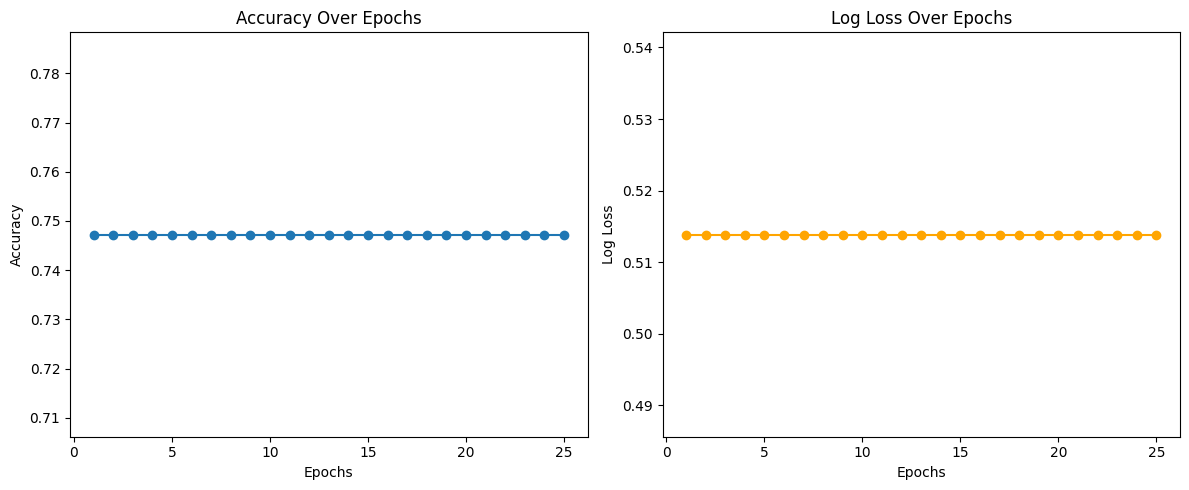

In [11]:
# Initialize and fit the Logistic Regression model
# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Use a large number of max_iter for batch learning
accuracy_history = []
logloss_history = []

# Number of epochs
num_epochs = 25

for epoch in range(num_epochs):
    logreg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)

    # Calculate log loss
    logloss = log_loss(y_test, y_prob)
    logloss_history.append(logloss)

# Create a plot to visualize accuracy and loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), accuracy_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), logloss_history, marker='o', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss Over Epochs')

plt.tight_layout()
plt.show()

You can notice that even though we 1) increased our data set size and 2) increased the number of epochs we have not had an increase in accuracy or a decrease in loss.

This simply means our algorithm isn't "learning" and that our data does not have enough signal for a logistic regression. Therefore, we need to pivot.

While logistic regression may be a valid option in some cases, let's try a different algorithm called RandomForestClassifier (which, as the name suggests, is a good for classifying data). In many cases, trying multiple algorithms may reveal that one is signifigantly better than the other.

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize and fit the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Set hyperparameters as needed
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9568377126286381
Precision: 0.9601420678768745
Recall: 0.95265724557719
F1 Score: 0.9563850125967087
ROC AUC Score: 0.9568106859627632
Confusion Matrix:
[[27350  1111]
 [ 1330 26763]]


Now we have something that can be considered a "decently trained algorithm". 

A few metrics to look at beside accuracy...
Precision - accuracy of positive prediction
Recall - sensitivity or true positive rate
F1 score - Balance of precision and recall
ROC AUC Score - Ability to distinguish between positive and negative cases
Confusion matrix - true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. High values in the top left and bottom right indicate a good output

Something we can do in a well trained model is look at the weights the model assigned certain variables so we can tell what the algorithm thought was "important"

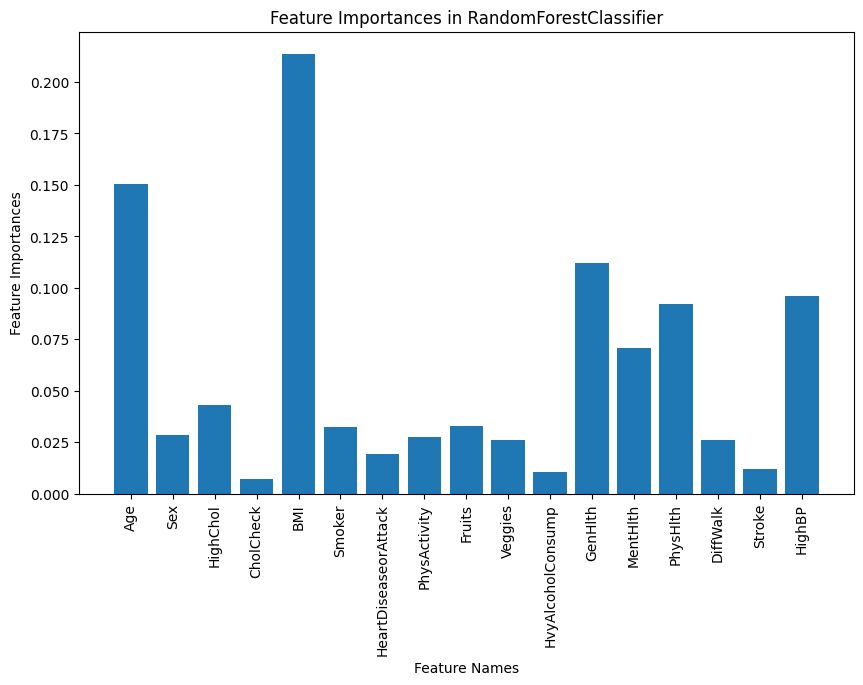

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Access feature importances
feature_importances = classifier.feature_importances_
feature_names = X_train.columns
# Assuming you have a list of feature names (e.g., feature_names)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importances')
plt.title('Feature Importances in RandomForestClassifier')
plt.xticks(rotation=90)
plt.show()

Now we can see that not all variables are equally considered when the algorithm tries to guess if a patient has diabetes. One way to help out our algorithm is to remove features that are not used or have extremely low weights. This is usually a subjective choice and many times is trial and error. But looking at algorithm weights can gleam insights on what's really important.

Now lets remove CholCheck, HvyAlcoholConsump, and Stroke and see how it impacts our outcome

        Age  Sex  HighChol       BMI  Smoker  HeartDiseaseorAttack  \
0  0.153846  1.0       0.0  0.306122     1.0                   0.0   
1  0.615385  0.0       0.0  0.418367     0.0                   0.0   

   PhysActivity  Fruits  Veggies  GenHlth  MentHlth  PhysHlth  DiffWalk  \
0           1.0     0.0      0.0      0.4       0.0  0.000000       0.0   
1           0.0     1.0      1.0      0.8       1.0  0.666667       1.0   

   HighBP  Diabetes  
0     0.0       0.0  
1     1.0       1.0  
Accuracy: 0.949906284259292
Precision: 0.9525908406794238
Recall: 0.9462499555049301
F1 Score: 0.9494098108894802
ROC AUC Score: 0.949882646140786
Confusion Matrix:
[[27138  1323]
 [ 1510 26583]]


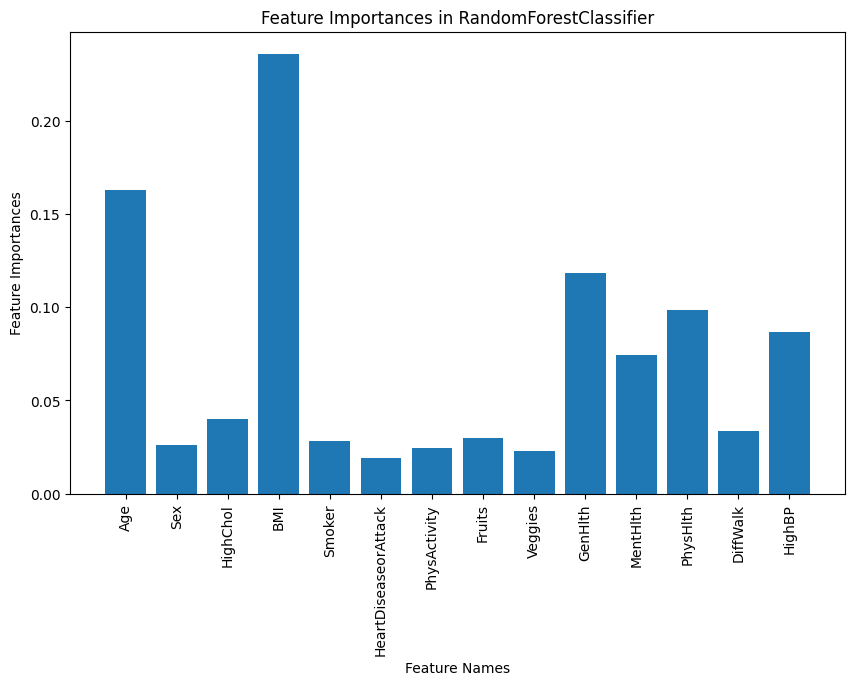

In [18]:
df_scaled.drop(["CholCheck", "HvyAlcoholConsump", "Stroke"], axis=1, inplace=True)
print(df_scaled.head(2))
y = df_scaled['Diabetes']
X = df_scaled.drop(columns=['Diabetes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Set hyperparameters as needed
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(confusion)

# Access feature importances
feature_importances = classifier.feature_importances_
feature_names = X_train.columns
# Assuming you have a list of feature names (e.g., feature_names)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importances')
plt.title('Feature Importances in RandomForestClassifier')
plt.xticks(rotation=90)
plt.show()

Now we see that the variables we removed were actually helping our algorithm become more accurate. Therefore, while it is tempting to remove low-weight variables, it isn't always the best option.

While we can play a few more tricks to increase this algorithm's accuracy, our previous 96% algorithm is "good enough" for this example.